<a href="https://colab.research.google.com/github/mint-aguccim/Machine_Learning_Programming/blob/main/3%EC%A3%BC%EC%B0%A8/weather_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# -----------------------------
# 1) 데이터 준비
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather.csv")
df  # print(df) 와 동일

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [2]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,300
Yes,66


Text(0.5, 1.0, 'Label')

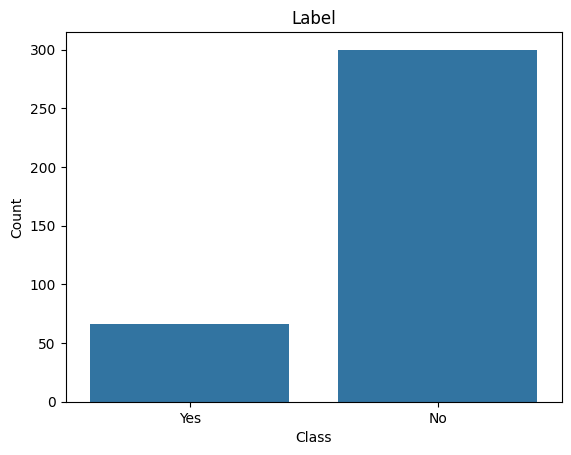

In [3]:
# 레이블 갯수 확인 (그래프)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x="RainTomorrow")
plt.xlabel("Class")        # 그래프 x 축 이름
plt.ylabel("Count")        # 그래프 y 축 이름
plt.title("Label")

In [4]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [5]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [6]:
df.columns  # 컬럼명 확인

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
# 모든 레이블을 숫자로 변형

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df.loc[:, column] = label_encoders[column].fit_transform(df[column])

In [9]:
df # 모든 컬럼 값이 숫자로 변경되었는지 확인

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,59,0,90,111,0,15,43,7,8,12,...,15,93,82,7,7,95,129,0,16,1
1,70,0,138,130,16,20,75,1,12,0,...,22,37,27,5,3,123,145,1,16,1
2,81,0,135,106,16,27,24,7,33,3,...,55,20,22,8,7,103,99,1,43,1
3,83,0,133,42,43,34,69,7,20,14,...,42,7,21,2,7,88,50,1,13,1
4,84,0,86,46,13,26,84,10,18,10,...,35,84,113,7,7,68,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100,152,0,36,99,6,29,10,...,2,64,46,1,3,148,167,0,0,0
362,48,0,81,141,0,51,104,3,17,6,...,8,95,98,0,1,120,160,0,0,0
363,49,0,125,78,0,40,36,2,14,1,...,33,131,147,3,2,96,81,0,0,0
364,51,0,125,130,0,23,50,7,16,11,...,25,103,91,6,7,107,146,0,0,0


In [11]:
# 입력과 출력 분리

X = df.drop(columns=["RainTomorrow"])
y = df["RainTomorrow"]

In [12]:
y # 분리 후 확인

,RainTomorrow
0,1
1,1
2,1
3,1
4,0
...,...
361,0
362,0
363,0
364,0


In [13]:
# 훈련과 테스트 데이터 분리


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42

)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # 각 데이터의 shape 확인 (전체데이터 수, 컬럼숫자)

((262, 23), (66, 23), (262,), (66,))

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# -----------------------------
# 2) 모델 구성
# -----------------------------
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# 로지스틱 회귀는 StandardScaler랑 묶어서 사용
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=500)
)

In [19]:
# -----------------------------
# 3) 모델 학습
# -----------------------------
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [20]:
# -----------------------------
# 4) 예측결과 생성
# -----------------------------


dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
lr_y_pred = lr.predict(X_test)

In [21]:
# 정답값 출력

y_test

,RainTomorrow
365,0
28,0
36,1
301,0
305,0
...,...
356,0
72,1
320,0
81,0


In [22]:
#예측값 출력

dt_y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

In [23]:
# -----------------------------
# 5) 예측결과와 정답을 비교한 정확도 평가
# -----------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)


print("=== DT Test Accuracy ===")
print(f"Decision Tree : {dt_acc:.4f}")
print (confusion_matrix(y_test,dt_y_pred))

print("=== RF Test Accuracy ===")
print(f"Random Forest : {rf_acc:.4f}")
print (confusion_matrix(y_test,rf_y_pred))

print("=== LR Test Accuracy ===")
print(f"Logistic Reg. : {lr_acc:.4f}")
print (confusion_matrix(y_test,lr_y_pred))

=== DT Test Accuracy ===
Decision Tree : 1.0000
[[54  0]
 [ 0 12]]
=== RF Test Accuracy ===
Random Forest : 1.0000
[[54  0]
 [ 0 12]]
=== LR Test Accuracy ===
Logistic Reg. : 0.9848
[[54  0]
 [ 1 11]]
